# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Understanding the structure of the data

In [2]:
# Define variables for folder and file name.
FOLDER = "../data/"
FILE = "foodhub_order.csv"

In [3]:
# Use of read_csv function to read the data in the foodhub file.
data = pd.read_csv(FOLDER + FILE)

In [4]:
# Use the head funtion to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# use of shape property  in order to get the number of rows and columns
data.shape

(1898, 9)

#### Observations:
*The dataset consists of 1,898 records (rows) across 9 variables (columns).*

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use the info() function in order yo have a concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
*The dataframe has 4 object columns and 5 numerical columns.*
* *4 columns have Integer datatype. (order_id, customer_id,
food_preparation_time, delivery_time).*
* *1 column has Float datatype. (cost_of_the_order).*
* *4 columns have Object datatype. Looking at the data this objects are str. (restaurant_name, cuisine_type, day_of_the_week, rating).*

*There is no missing values in the dataframe. As all the columns have 1898 non null values.*


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Validate missing values by using the isnull and sum functions
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
*Looking at the results, there is no missing values in the dataset.There is no need to use a method to treat missing values.*

*During the initial analysis of the data with the head() method. I notice that the rating column has some values "Not given". This requires to be further analysed.*

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Use the describe function in order to get the descriptive statistics of the numerical data.
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.0,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.0,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.0,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.0,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:


---


#####Identifier Variables

*The order_id and customer_id fields, while numeric in nature, serve solely as categorical identifiers for orders and customers, and thus are excluded from statistical analysis.*


---


#####Key Metrics Analysis

Order Costs:

* Average cost: \$16.50
* Standard Deviation: $7.48
* Range: \$4.47 - \$35.41
* Quartiles:
    - Q1 (25%): $12.08
    - Q2 (Median): $14.14
    - Q3 (75%): $22.30

*The disparity between mean and median values indicates a right-skewed distribution, suggesting the presence of higher-value orders influencing the average.*

Processing Times:

* Food Preparation:
    - **Mean (Average): 27.37 minutes**
    - Standard Deviation: 4.63 minutes
    - **Minimum time: 20 minutes**
    - **Maximum time: 35 minutes**
    - Median: 27 minutes
* Delivery:
    - Mean: 24.16 minutes
    - Standard Deviation: 4.97 minutes
    - Minimum Time: 15 minutes
    - Maximum Time: 33 minutes
    - Median: 25 minutes

*The data shows consistent service times with moderate variability in both preparation and delivery times.*



### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# Use the function value_counts() to get the frequency of the rating column. Also get the percentage of each rating
pd.DataFrame({'Rating': data['rating'].value_counts().index, 'Count': data['rating'].value_counts().values, 'Percentage': (data['rating'].value_counts().values / data.shape[0]) * 100})

,Rating,Count,Percentage
0,Not given,736,38.777661
1,5,588,30.979979
2,4,386,20.337197
3,3,188,9.905163


#### Observations:
*Of the total orders analyzed, 736 (approximately 39%) lack customer ratings. The distribution of rated orders is as follows: 31% received 5-star ratings, 20.33% received 4-star ratings, and 10% received 3-star ratings.*

*Given that unrated orders constitute the largest segment of our dataset, data elimination would significantly compromise our analysis. Furthermore, imputing values using mean or median substitution would not be statistically sound, considering the predominance of unrated orders.*

*The recommendation is to convert "Not given" entries to NaN (Not a Number) values. This will be explored in the univarial analisys of rating*

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### **order_id**

In [10]:
# Get the number of unique orders
data['order_id'].nunique()

1898

**Observations:**

*order id is a categorical variable. It's only purpose is to identify an individual order. The only posible thing to analyze is to observe if the order number is unique.*

*The result of using the nunique function is that there are 1898 unique orders. This number of unique orders corresponds to the number of rows in the data. Which means that every row in the data corresponds to a unique order*



#### customer_id

In [11]:
# Get the number of unique customers
data['customer_id'].nunique()

1200

In [12]:
# Create a dataframe that allows to visualize the number of customers that have one order to the maximun number of orders by the most
ordernum = data['customer_id'].value_counts().unique()
ordernum.sort()
pd.DataFrame({'Number of Orders': ordernum, 'Count': data['customer_id'].value_counts().groupby(data['customer_id'].value_counts()).count(), 'Percentage': round(((data['customer_id'].value_counts().groupby(data['customer_id'].value_counts()).count())/1200) * 100, 2) }).set_index('Number of Orders')

,Count,Percentage
Number of Orders,,
1,784,65.33
2,267,22.25
3,83,6.92
4,33,2.75
5,19,1.58
6,6,0.50
7,4,0.33
8,1,0.08
9,1,0.08


**Observation:**

*The dataset contains 1,898 total orders distributed among 1,200 unique customers. This indicates a customer base predominantly composed of one-time purchasers.*


---


Low Frequency Customers
* Single-Order Customers: 784 customers (65.33%)
* Two-Order Customers: 267 customers (22.25%)
* Three-Order Customers: 83 customers (6.92%)

High Frequency Customers:
* Moderate Users (4-5 orders): 52 customers (4.33%)
* High-Frequency Users (6+ orders): 14 customers (1.17%)
* Most Loyal Customer: 1 customer with 13 orders (0.08%)



#### restaurant_name

In [13]:
# Get the number of unique customrestaurantsers
data['restaurant_name'].nunique()

178

In [14]:
# Observe the most popular restaurants
rest_num = data['restaurant_name'].value_counts()
rest_num.head(10)

restaurant_name
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: count, dtype: int64

In [15]:
# Observe the least popular restaurants
rest_num.tail(10)

restaurant_name
Hunan Manor              1
Coppola's East           1
Emporio                  1
Wa Jeal                  1
Le Zie 2000 Trattoria    1
Rye House                1
Hiroko's Place           1
Frank Restaurant         1
Sarabeth's West          1
'wichcraft               1
Name: count, dtype: int64

In [16]:
# Obtain the number of restaurants with one order
len([num for num in rest_num.index if rest_num[num] == 1])

50

In [17]:
# Obtain the number of restaurants with two orders
len([num for num in rest_num.index if rest_num[num] == 2])

23

In [18]:
# Obtain the number of restaurants with three orders
len([num for num in rest_num.index if rest_num[num] == 3])

23

**Observation:**

*The dataset comprises 178 unique restaurants. The most popular establishment is Shake Shack, with 219 orders, followed by The Meatball Shop with 132 orders and Blue Ribbon Sushi with 119 orders. Additionally, 50 restaurants received only one order, while 23 restaurants recorded two orders, and another 23 restaurants had three orders.*  

#### cuisine_type

In [19]:
data['cuisine_type'].nunique()

14

In [20]:
ser =data['cuisine_type'].value_counts()
pd.DataFrame({'Cuisine Type': ser.index, 'Count': ser.values, 'Percentage': ((ser.values / data.shape[0]) * 100).round(2)}).set_index('Cuisine Type')

,Count,Percentage
Cuisine Type,,
American,584,30.77
Japanese,470,24.76
Italian,298,15.70
Chinese,215,11.33
Mexican,77,4.06
Indian,73,3.85
Middle Eastern,49,2.58
Mediterranean,46,2.42
Thai,19,1.00


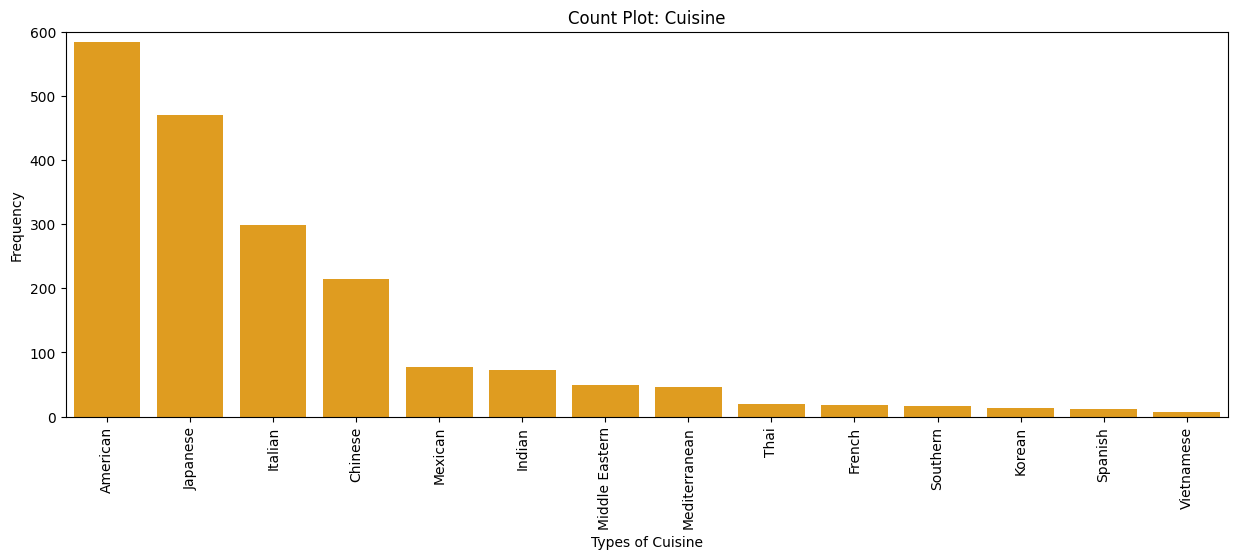

In [21]:
# Display the count plot for cuisine
plt.figure(figsize = (15,5))
plt.title('Count Plot: Cuisine')
plt.ylim(0,600)
plt.ylabel('Frequency')
plt.xlabel('Types of Cuisine')
plt.xticks(rotation=90)
sns.countplot(data=data, x='cuisine_type', color='orange', order= data['cuisine_type'].value_counts().index);

**Observation:**

*There are 14 unique types of cuisines. The most popular cuisines are American, Japanese, Italian, Chinese and Mexican.*

* American cuisine is the most common, with 584 occurrences (30.77%), making up nearly a third of all instances.

* Japanese cuisine follows closely with 470 occurrences (24.76%), representing about a quarter of the total.

* Italian cuisine is third, comprising 15.70% (298 occurrences).

* Chinese cuisine (11.33%) is the only other category above 10%.

* Mexican (4.06%) and Indian (3.85%) cuisines are present but in much smaller proportions.



#### cost_of_order

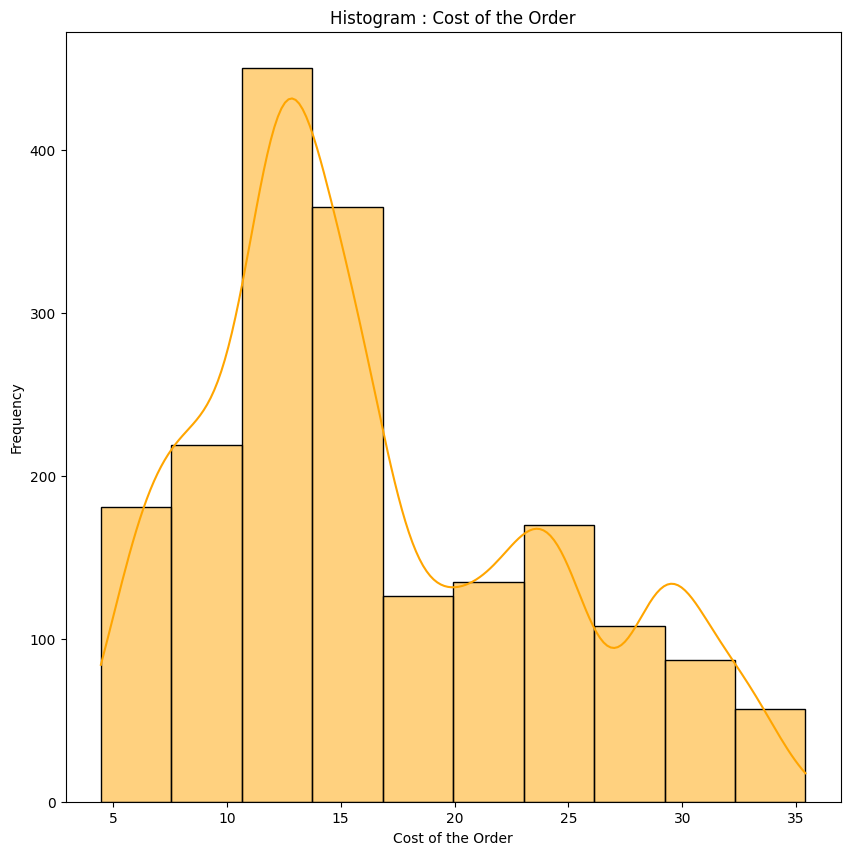

In [22]:
#Histogram of cost_of_the_order
plt.figure(figsize = (10,10))
plt.title('Histogram : Cost of the Order')
plt.ylabel('Frequency')
plt.xlabel('Cost of the Order')
sns.histplot(data=data, x='cost_of_the_order', color='orange', kde=True, bins=10);

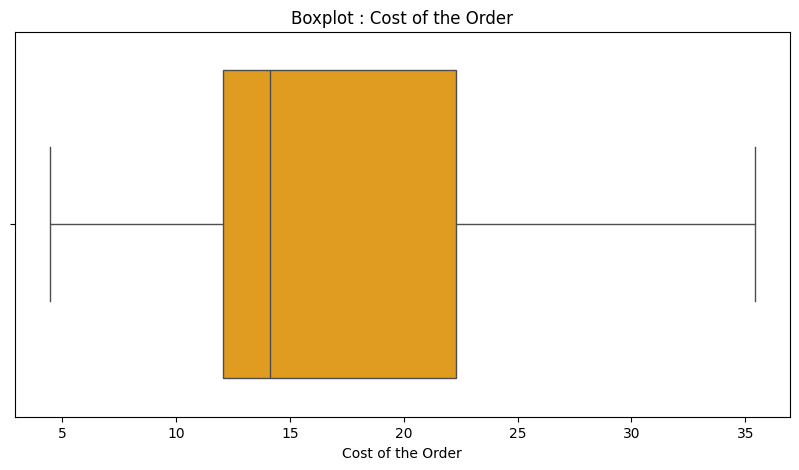

In [23]:
# Boxplot for Cost
plt.figure(figsize = (10,5))
plt.title('Boxplot : Cost of the Order')
plt.xlabel('Cost of the Order')
sns.boxplot(data=data, x='cost_of_the_order', color='orange');

**Observation:**

*The histogram shows that most orders are on the lower side as much of the dataponts are in the \$10 to \$25 range. Ater \$15 there is a tendency to have less higer price orders. The histogram revels 2 peaks mining a bimodal distibution. The primary peak occurs in the \$12 to \$14 range and a smaller peak around \$25.*

*The box plot indicates a total range from \$5 to \$35 and no outliers. The median is \$14.14, and 50% of the data is in the range (Interquartile Range)\$12.08 to \$22.31*

*Slight right skew evident in the histogram's long tail. Meaning that while most orders fall in the 10-25 range, some higher-cost orders push the maximum toward 35.*

*There is a wide spread in food order costs, meaning that prices vary significantly across restaurants.*

* Minimum: 4.47
* Maximum: 35.41
* Mean: 16.50
* Median: 14.14
* Q1 (25 percentile): 12.08
* Q3 (75 percentile): 22.31

#### day_of_the_week

In [24]:
# Observe the number of unique values
print(data['day_of_the_week'].nunique())
data['day_of_the_week'].unique()

2


array(['Weekend', 'Weekday'], dtype=object)

In [25]:
# Count the number of orders in the weekend and on weekdays. Get the percentage.
ser = data['day_of_the_week'].value_counts()
pd.DataFrame({'Day of the Week': ser.index, 'Count': ser.values, 'Percentage': ((ser.values / data.shape[0]) * 100).round(2)}).set_index('Day of the Week')

,Count,Percentage
Day of the Week,,
Weekend,1351,71.18
Weekday,547,28.82


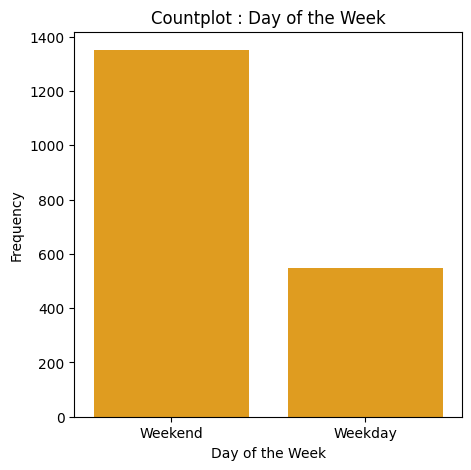

In [26]:
# Generate a countplot to visualize the number of orders by category
plt.figure(figsize = (5,5))
plt.title('Countplot : Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
sns.countplot(data=data, x='day_of_the_week', color='orange');

**Observation**

*The day of the week variable consists of two categories: Weekday and Weekend. Customers place a higher number of orders during the Weekend, with 1,351 orders, accounting for 71.18% of the total. In contrast, Weekday orders are significantly lower, with 547 orders, representing 28.82% of the total.*

#### rating

In [27]:
# Observe the unique categories in the rating variable
data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [28]:
# Obtain the number of orders for each rating and get the percentage
rating_counts = data['rating'].value_counts()
rating = pd.DataFrame({'Rating': rating_counts.index, 'Count': rating_counts.values, 'Percentage': ((rating_counts.values / data.shape[0]) * 100).round(2)}).set_index('Rating')
rating

,Count,Percentage
Rating,,
Not given,736,38.78
5,588,30.98
4,386,20.34
3,188,9.91


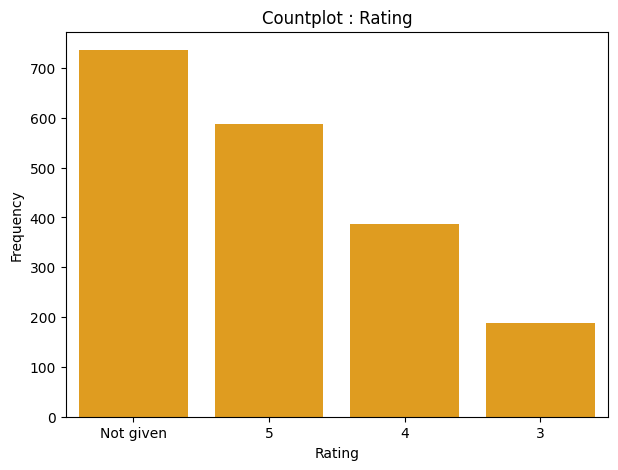

In [29]:
# Generate a countplot in order to visualize the number of orders by rating
plt.figure(figsize = (7,5))
plt.title('Countplot : Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
sns.countplot(data=data, x='rating', color='orange', order= data['rating'].value_counts().index);

In [30]:
# Create a hard copy of the data and treat the value Not given in rating as a NaN.
rating_nan = data.copy(deep=False)
rating_nan['rating'] = rating_nan['rating'].replace('Not given', np.nan)
rating_nan['rating'] = rating_nan['rating'].astype(float)
rating_nan['rating'].value_counts()

rating
5.0    588
4.0    386
3.0    188
Name: count, dtype: int64

**Observation:**

*The rating variable represents the customer ratings assigned to their orders. It includes four categories: 5, 4, 3, and Not Given. The most common category is Not Given, with 736 orders lacking a rating, accounting for 38.78% of total orders.*

*Among rated orders, a rating of 5 is the most frequent, with 588 orders (30.98%). This is followed by a rating of 4, with 386 orders (20.34%), and a rating of 3, with 188 orders (9.91%).*

### food_preparation_time

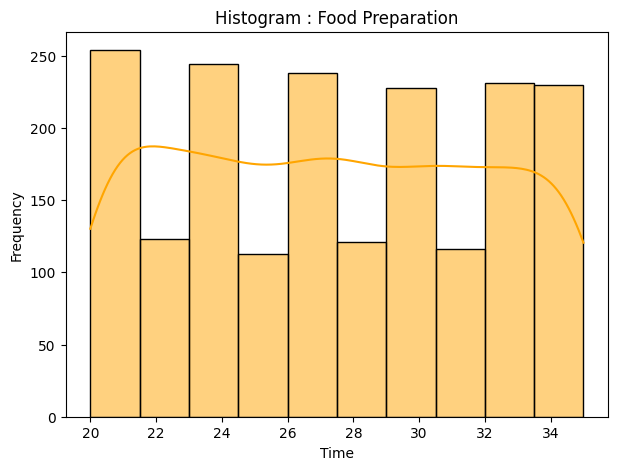

In [31]:
# Generate a histogram of Food Preparation time
plt.figure(figsize = (7,5))
plt.title('Histogram : Food Preparation')
plt.xlabel('Time')
plt.ylabel('Frequency')
sns.histplot(data=data, x='food_preparation_time', color='orange', kde=True, bins=10);

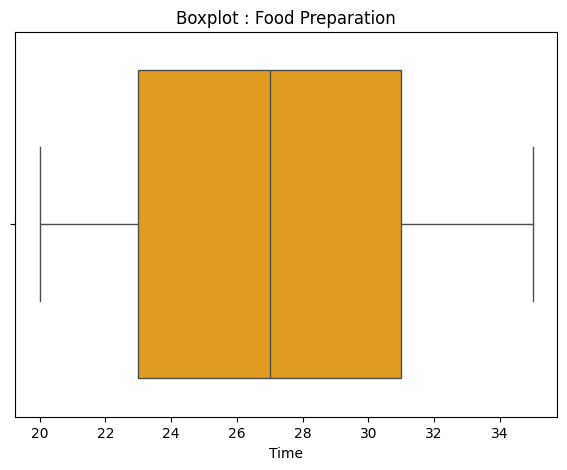

In [32]:
# Generate a Boxplot of Food Preparation Time
plt.figure(figsize = (7,5))
plt.title('Boxplot : Food Preparation')
plt.xlabel('Time')
sns.boxplot(data=data, x='food_preparation_time', color='orange');

**Observations**

*The histogram reveals a slightly higher frequency of orders in the 20-22 minute range. There is a gradual decrease in frequency for longer preparation times (32-35 minutes).*

*The boxplot indicates a balanced distribution as the mean is 27.37 minutes and the median 27 minutes. The minimun time is 20 minutes and the maximun 35 minutes. There are no outliers and 75% of the orders are prepared in 31 minutes or less*

* Minimum: 20 minutes
* Maximum: 35 minutes
* Mean: 27.37 minutes
* Median: 27 minutes
* Q1 (25 percentile): 23 minutes
* Q3 (75 percentile): 31 minutes



#### delivery_time

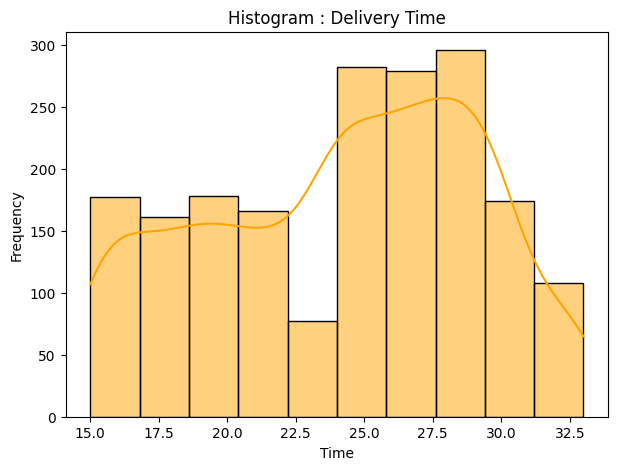

In [33]:
# Generate a histogram Delivery Time
plt.figure(figsize = (7,5))
plt.title('Histogram : Delivery Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
sns.histplot(data=data, x='delivery_time', color='orange', kde=True, bins=10);

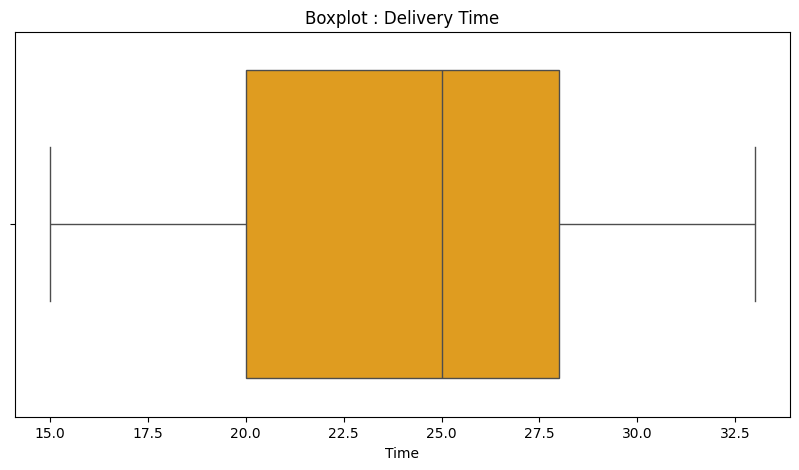

In [34]:
# Generate a Boxplot of Food Preparation Time
plt.figure(figsize = (10,5))
plt.title('Boxplot : Delivery Time')
plt.xlabel('Time')
sns.boxplot(data=data, x='delivery_time', color='orange');

In [35]:
data['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

**Observations**
*The histogram reveals a bimodal distribution. The first peak is around the 15 to 20 minutes range, the second and larger peak is around the 25 to 30 minutesrange. The highest frequency occurs in the 27.5-30 minutes range. There is a gradual decline in frequency for deliveries after 30 minutes.*

*The boxplot reflects a slight right skew. Mostly because the second peak. The median is very close to the mean so the skew is very small. There are no outliers and 75% of the orders are delivery in 27 minutes or less.*

* Minimum: 15 minutes
* Maximum: 33 minutes
* Mean: 24.16 minutes
* Median: 25 minutes
* Q1 (25 percentile): 20 minutes
* Q3 (75 percentile): 28 minutes

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [36]:
# Count the number of orders by restaurant
data['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:

The most popular restaurants by total count of orders are:

* Shake Shack: 219 orders
* The Meatball Shop: 132 orders
* Blue Ribbon Sushi: 119 orders
* Blue Ribbon Fried Chicken: 96 orders
* Parm: 68 orders

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [37]:
# Obtain the mos popular restaurant on the Weekends
data[data['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(1)

cuisine_type
American    415
Name: count, dtype: int64

#### Observations:

*American cuisine is the most popular during the weekends. American cuisine restaurants have 415 orders in the weekends.*

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [38]:
# Obtain the number of orders that cost more than 20 dollars and get the percentage
print(f"{round(data[data['cost_of_the_order'] > 20].shape[0] / data.shape[0] * 100, 2)}% of orders cost more than 20 dollars")

29.24% of orders cost more than 20 dollars


#### Observations:
*29.24% of orders cost more than 20 dollars*

### **Question 10**: What is the mean order delivery time? [1 mark]

In [39]:
# Obtain the mean for delivery time
print(f"Delivery time mean: {round(data['delivery_time'].mean(),2)}")

Delivery time mean: 24.16


#### Observations:

*Delivery time mean: 24.16*

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [40]:
# Get the top 3 customers (more orders)
data['customer_id'].value_counts().head(3)


customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:

*The discount vouchers are for the following customers with more orders:*

1.   Customer 52832 with 13 orders
2.   Customer 47440 with 10 orders
3.   Customer 83287 with 9 orders



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Relationship Analisys

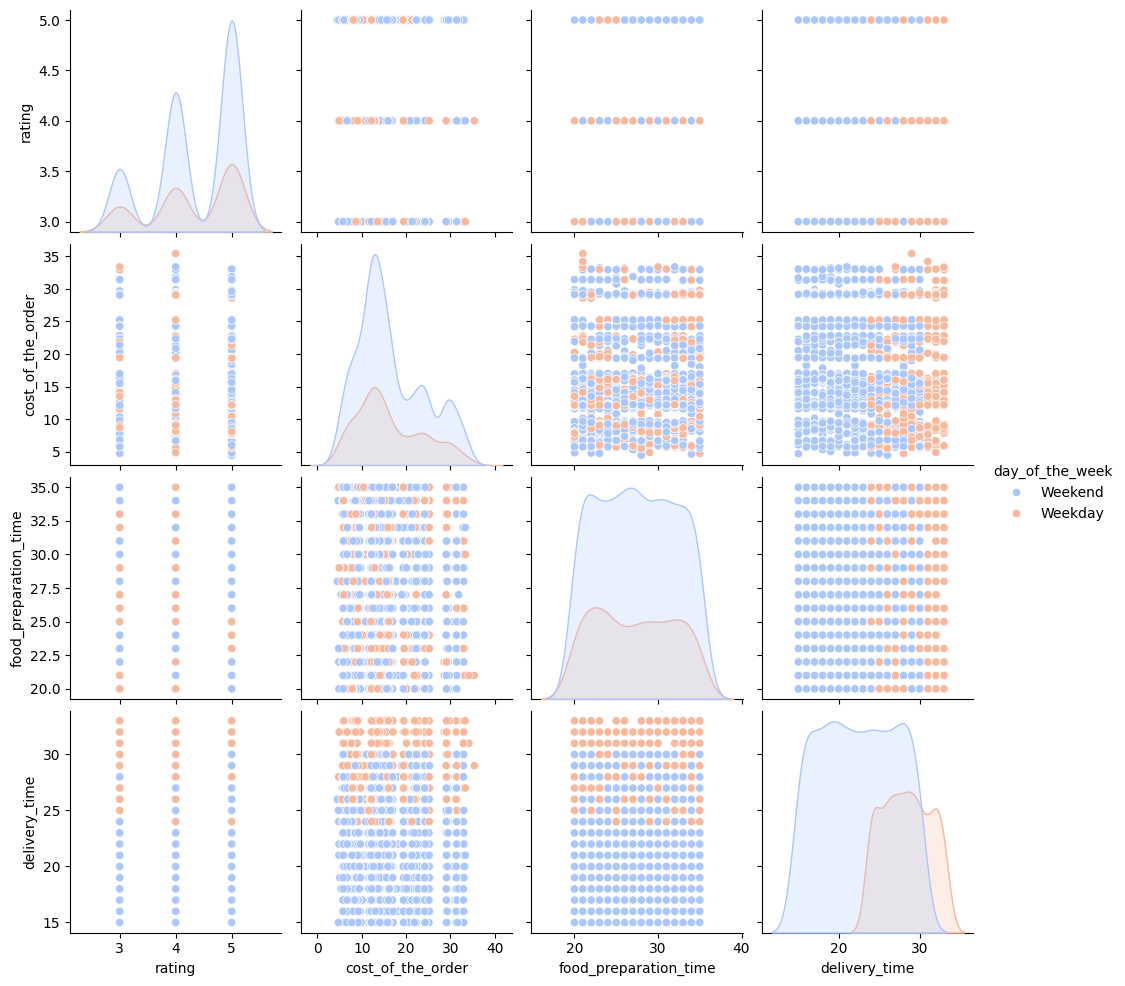

In [41]:
# Understand the distribution of the numerical data.
sns.pairplot(data=rating_nan[['rating','cost_of_the_order', 'food_preparation_time', 'delivery_time', 'day_of_the_week']], hue='day_of_the_week', palette='coolwarm');

**Observation:**

* **Rating:** *The distribution graph shows that customers tend to order more during the weekends.*
* **Cost vs Rating:** *Looking at the scatter plot, there doesn't seem to be a strong correlation between the cost of orders and ratings.*
* **Weekday vs Weekend Patterns:** *There appear to be differences in delivery times between weekdays (coral dots) and weekends (blue dots). During the weekdays the delivery times increses.*

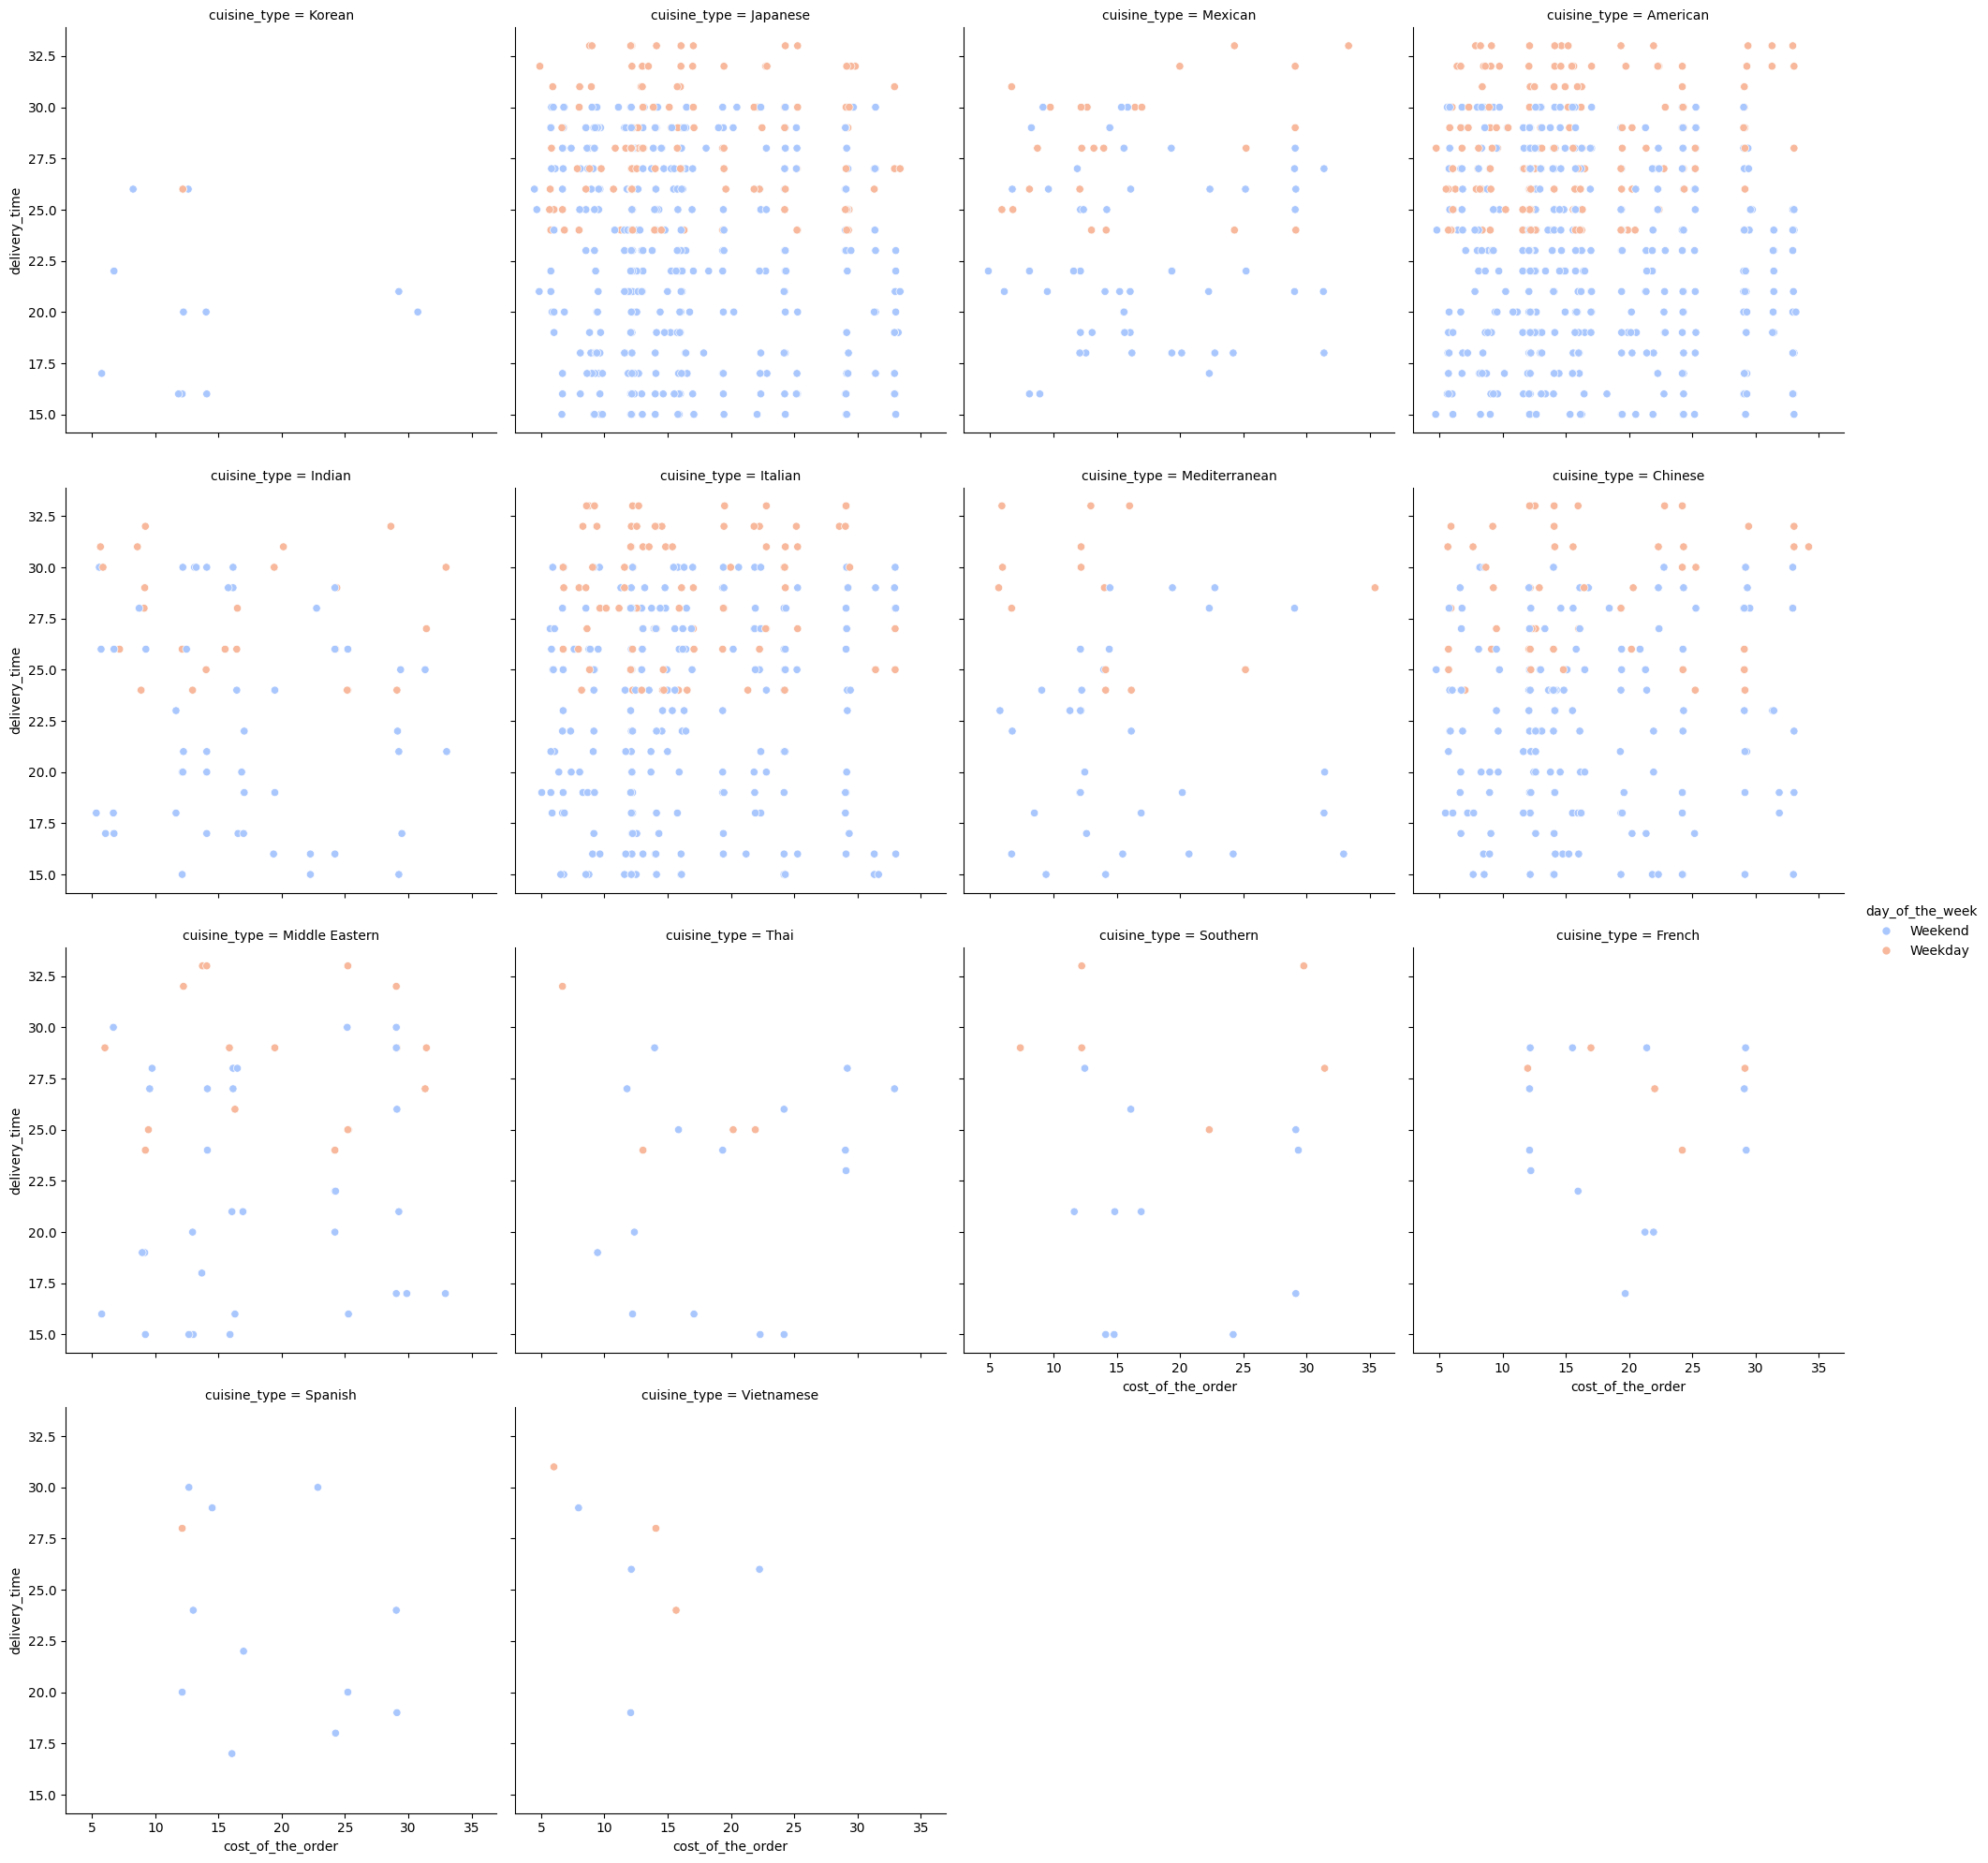

In [42]:
# determine if there are relationships between cost ande delivery time and if there is a change depending on the day of the week.
sns.relplot(data=data, x='cost_of_the_order', y='delivery_time', hue='day_of_the_week', col='cuisine_type', col_wrap=4 ,palette='coolwarm');

**Observation:**

*The distribution plot for Cost of the order vs Delivey Time don't show a correlation between these variables. Looking at the Cuisines also doesn't show that the type of cuisine impacts the relationship of these variables.*

#### Cost Analysis

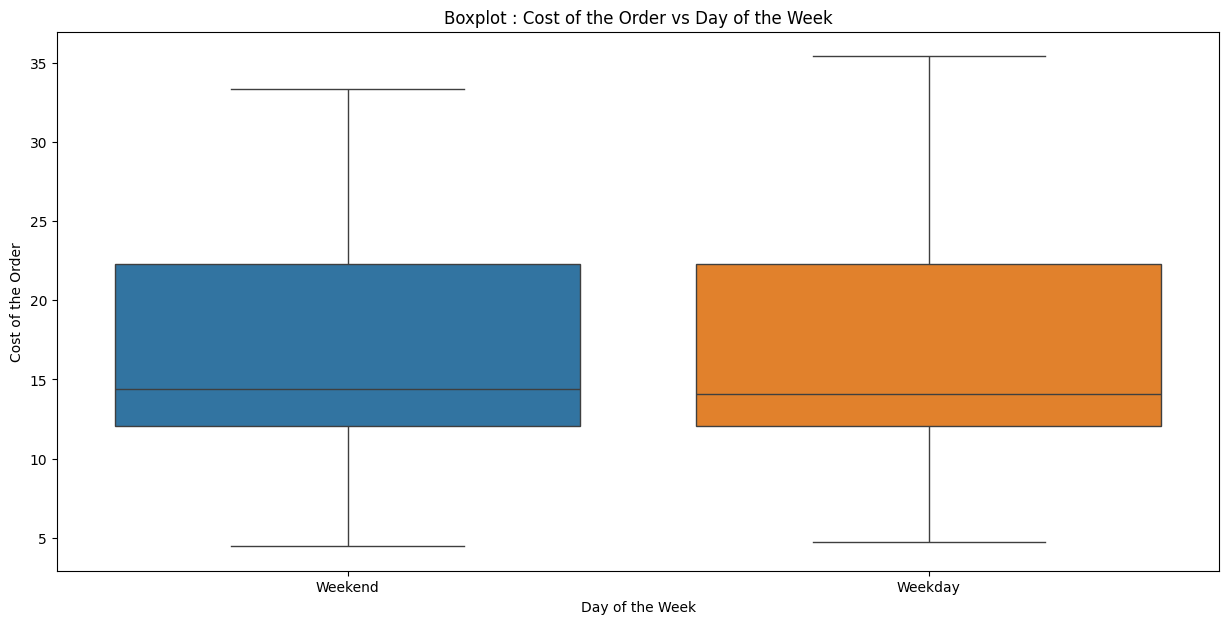

In [43]:
# Boxplot of the cost during the day of the week
plt.figure(figsize = (15,7))
plt.title('Boxplot : Cost of the Order vs Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cost of the Order')
sns.boxplot(data=data, x='day_of_the_week', y='cost_of_the_order', hue='day_of_the_week');

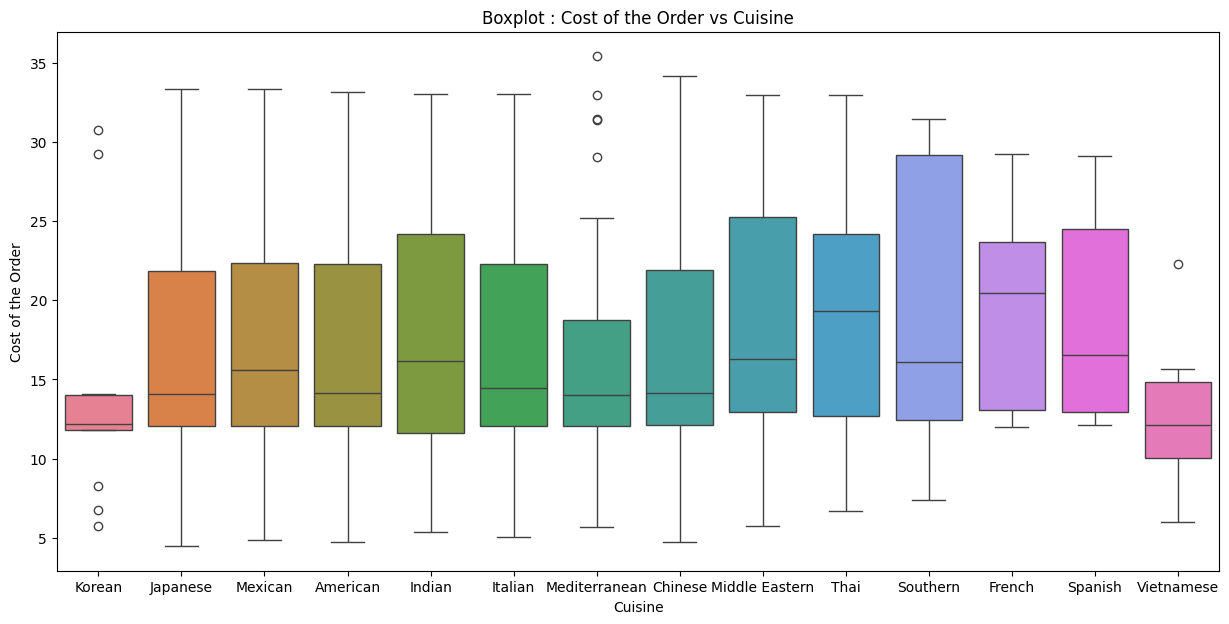

In [44]:
# Boxplot of the cost by cuisine type
plt.figure(figsize = (15,7))
plt.title('Boxplot : Cost of the Order vs Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Cost of the Order')
sns.boxplot(data=data, x='cuisine_type', y='cost_of_the_order', hue='cuisine_type');

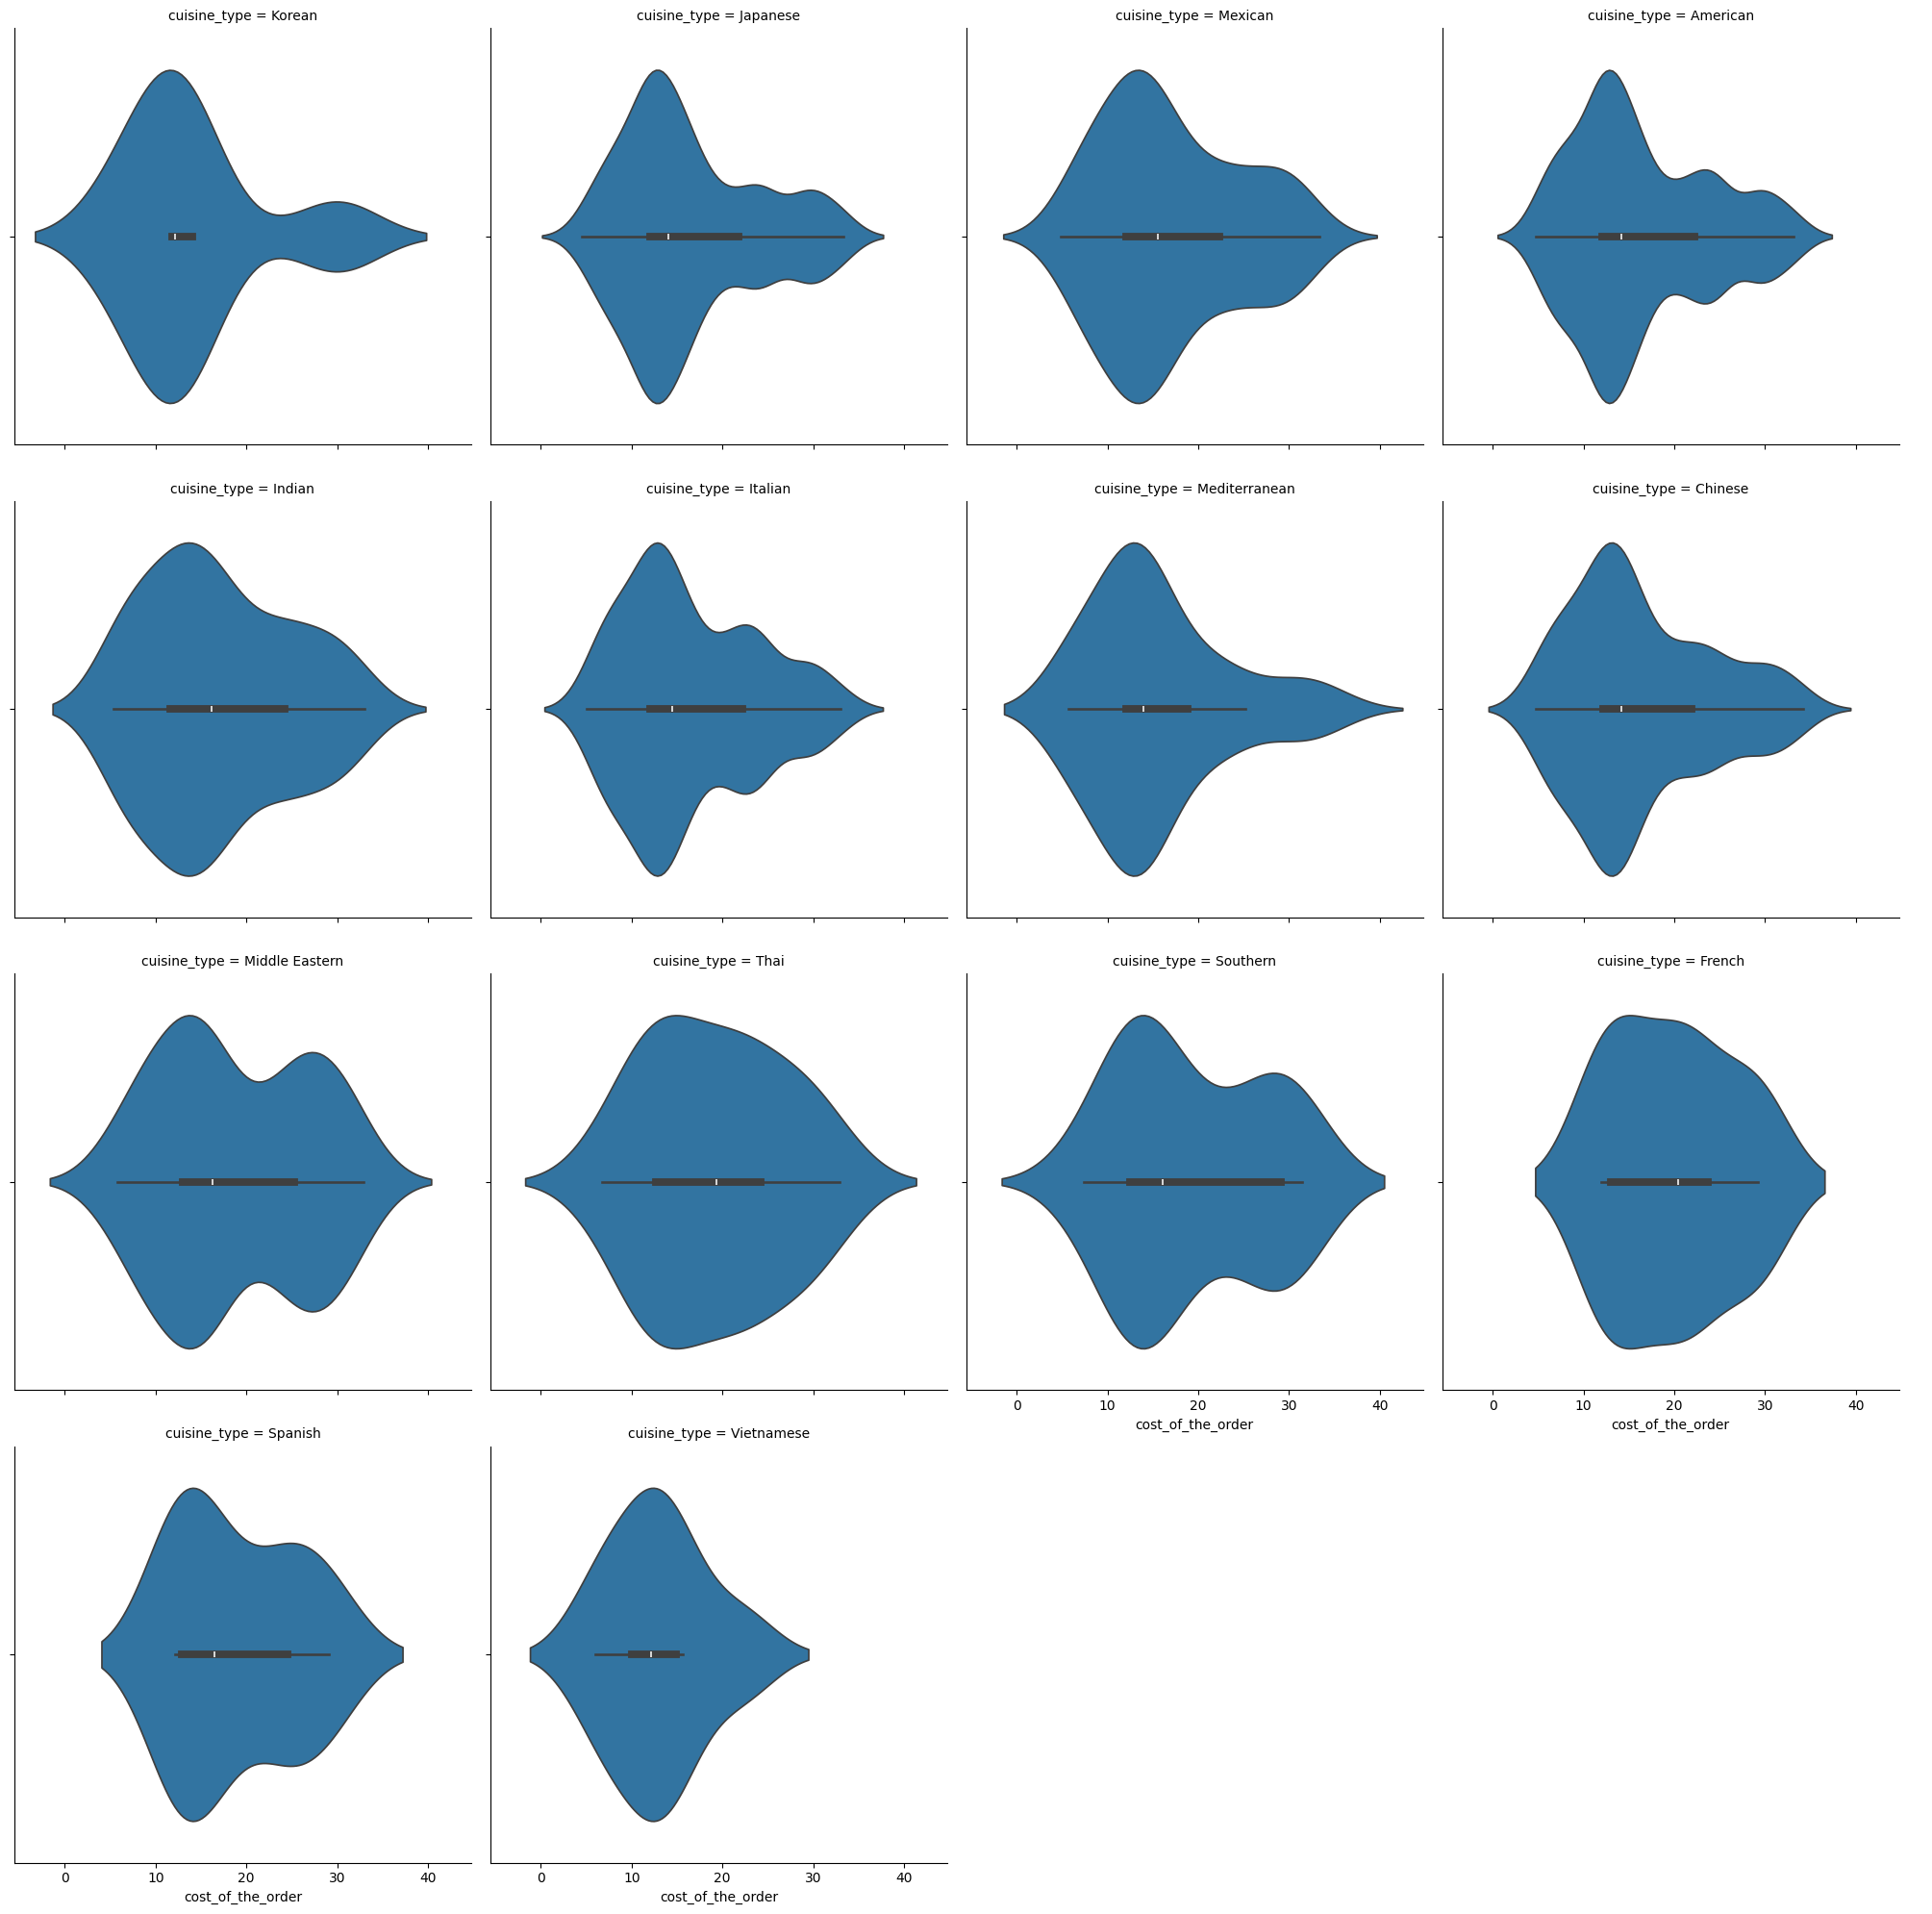

In [45]:
# Dispersion of price by Cuisine
sns.catplot(data=data, x='cost_of_the_order', col='cuisine_type', kind='violin', col_wrap=4);

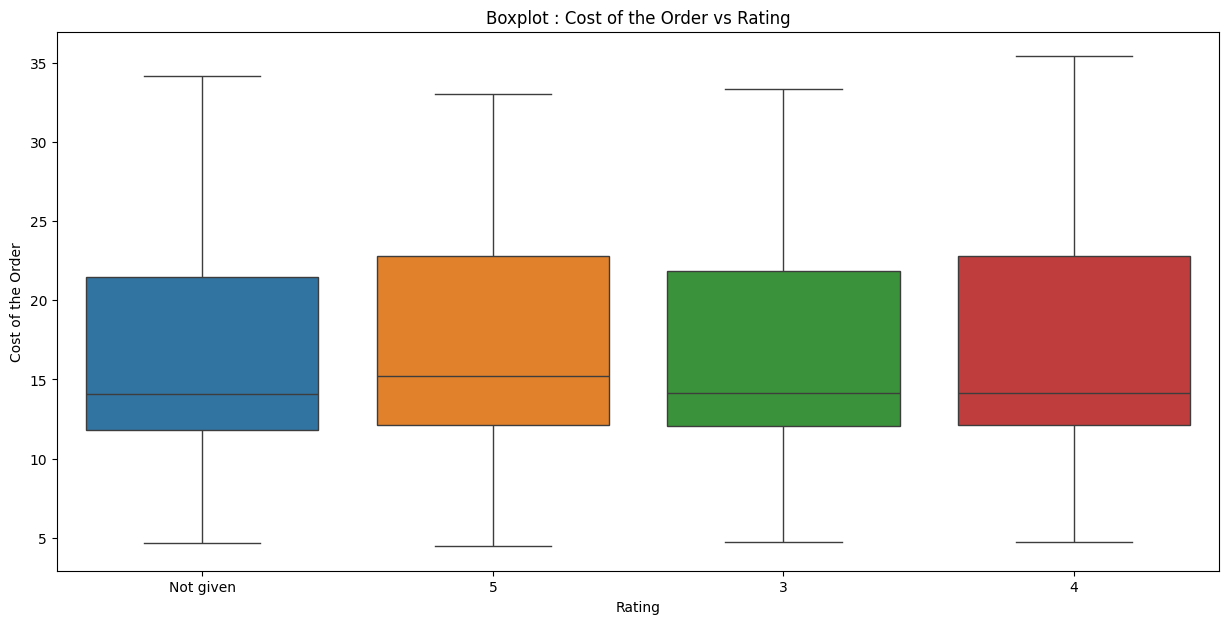

In [46]:
# Boxplot of the cost by the rating of the order
plt.figure(figsize = (15,7))
plt.title('Boxplot : Cost of the Order vs Rating')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
sns.boxplot(data=data, x='rating', y='cost_of_the_order', hue='rating');

Observation:

Cost of the Order vs Day of the Week:

* *The median cost appears to be similar for both weekends (\$14-\$15) and weekdays (\$14).*
* *Both categories have very similar interquartile range, prices are consistent during weekdays and weekends. There are a few more expensive orders on the weekend. This might show that some customers either do larger orders or select more expensive meals.*
* *Both weekend and weekday orders range from about 5 to 35 units, as shown by the whiskers.*
* *There doesn't appear to be  significant outliers.

Cost of the Order vs Cuisine Type:

* *Southern, French, Mediterranean and Thai have several high-cost outliers, meaning a few orders were significantly more expensive.*
* *Vietnamese and Korean cuisines have lower median costs and smaller variability, suggesting they are more affordable on average.*
* *Cuisines like Japanese, American, and Thai have higher upper whiskers, meaning some orders are significantly more expensive.*
* Korean cuisine has otliers at the lower and higher cost range. Mediterranean has the higher cost outlier.

Cost of the Order vs Rating
* *The median costs are fairly similar across all rating categories.*
* *There doesn't appear to be a strong relationship between order cost and rating. Higher cost orders don't necessarily receive better or worse ratings.*

#### Revenue Analysis - Using average cost and number of orders

In [47]:
# View total revenue, number of orders and average cost by restaurant
revenue = data.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False)
average = data.groupby(['restaurant_name'])['cost_of_the_order'].mean().sort_values(ascending = False).round(2)
total = data.groupby(['restaurant_name'])['cost_of_the_order'].count().sort_values(ascending = False)
rest_data = pd.merge(revenue, average, on='restaurant_name')
rest_data = pd.merge(rest_data, total, on='restaurant_name')
rest_data.columns = ['Revenue', 'Average', 'Orders']
rest_data.head(10)

,Revenue,Average,Orders
restaurant_name,,,
Shake Shack,3579.53,16.34,219
The Meatball Shop,2145.21,16.25,132
Blue Ribbon Sushi,1903.95,16.00,119
Blue Ribbon Fried Chicken,1662.29,17.32,96
Parm,1112.76,16.36,68
RedFarm Broadway,965.13,16.36,59
RedFarm Hudson,921.21,16.75,55
TAO,834.50,17.03,49
Han Dynasty,755.29,16.42,46


In [48]:
rest_data.sort_values(by='Average', ascending=False).head(10)

,Revenue,Average,Orders
restaurant_name,,,
Kambi Ramen House,32.93,32.93,1
Emporio,31.43,31.43,1
Bhatti Indian Grill,62.23,31.12,2
Haru Gramercy Park,29.83,29.83,1
Lucky Strike,29.25,29.25,1
Il Bambino,29.25,29.25,1
Sarabeth's,87.40,29.13,3
Rohm Thai,29.10,29.10,1
Klong,29.05,29.05,1


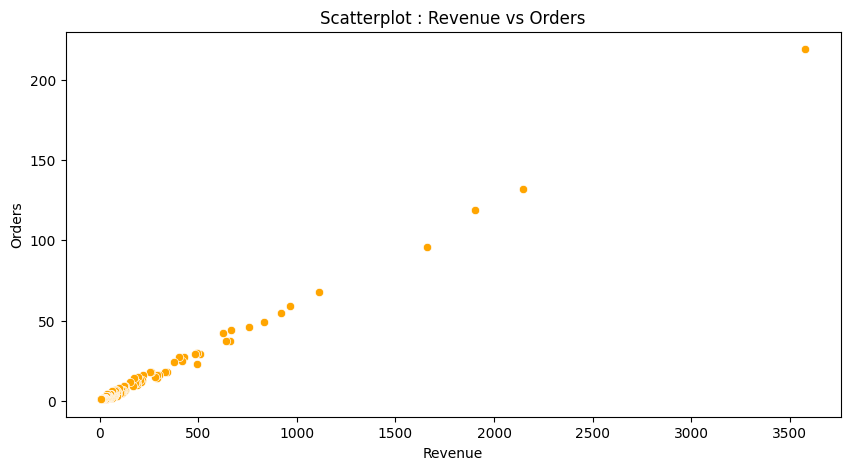

In [49]:
# Scatterplot to visialize the relationship between the number of orders and total revenue
plt.figure(figsize = (10,5))
plt.title('Scatterplot : Revenue vs Orders')
plt.xlabel('Revenue')
plt.ylabel('Orders')
sns.scatterplot(data=rest_data, x='Revenue', y='Orders', color='orange');

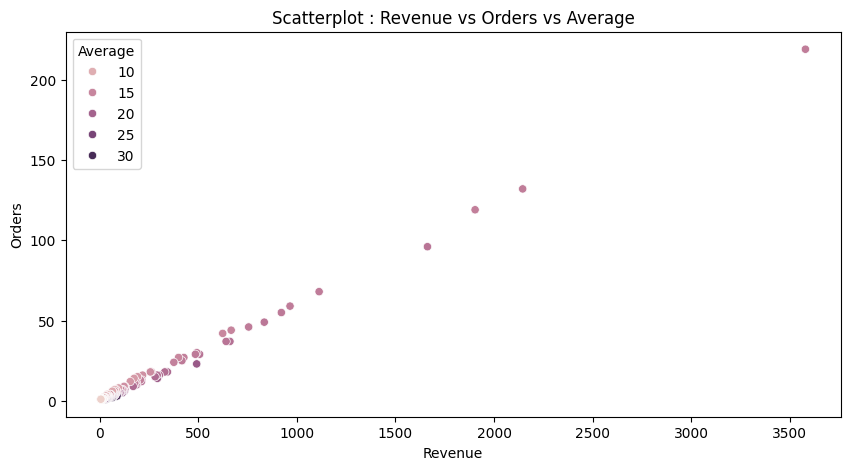

In [50]:
# Scatterplot to visialize the relationship between the number of orders and total revenue
plt.figure(figsize = (10,5))
plt.title('Scatterplot : Revenue vs Orders vs Average')
plt.xlabel('Revenue')
plt.ylabel('Orders')
sns.scatterplot(data=rest_data, x='Revenue', y='Orders', hue='Average');

**Observation:**

*The new dataframe groups by restaurant the number of orders, average cost and total revenue. As expected the higher number of orders generates more revenue for the restaurant.*

*Most restaurants are clustered in the low revenue and low order quadrant. The revenue spans from near 0 to about \$3500, with most restaurants generating revenue below \$1000.*

#### Rating Analysis

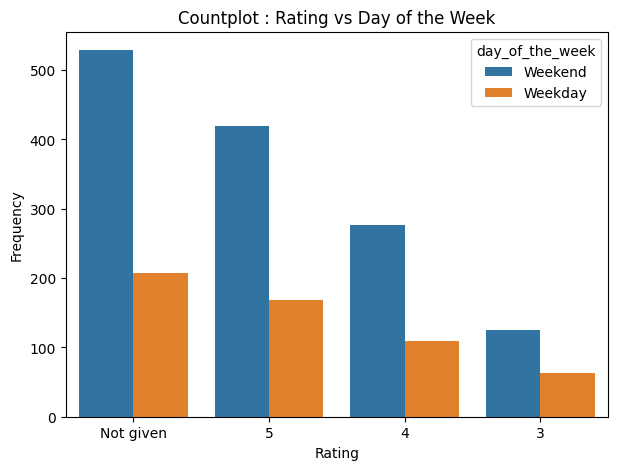

In [51]:
# Relationship between Rating and Day of the Week
plt.figure(figsize = (7,5))
plt.title('Countplot : Rating vs Day of the Week')
plt.xlabel('Rating')
plt.ylabel('Frequency')
sns.countplot(data=data, x='rating', hue='day_of_the_week', order= data['rating'].value_counts().index);

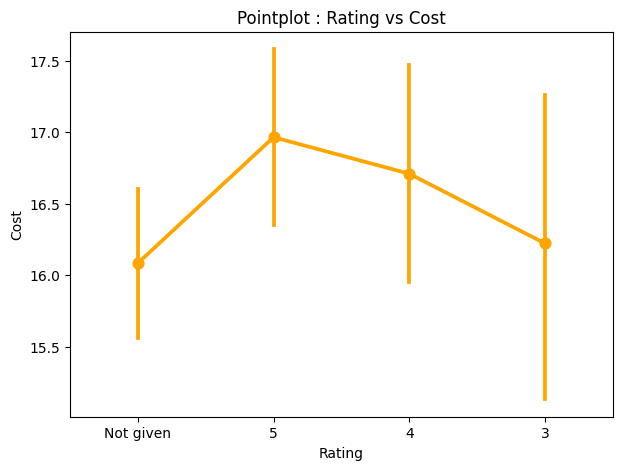

In [52]:
#Relationship between Rating and Cost
plt.figure(figsize = (7,5))
plt.title('Pointplot : Rating vs Cost')
plt.xlabel('Rating')
plt.ylabel('Cost')
sns.pointplot(data=data, x='rating', y='cost_of_the_order', color='orange', order= data['rating'].value_counts().index);

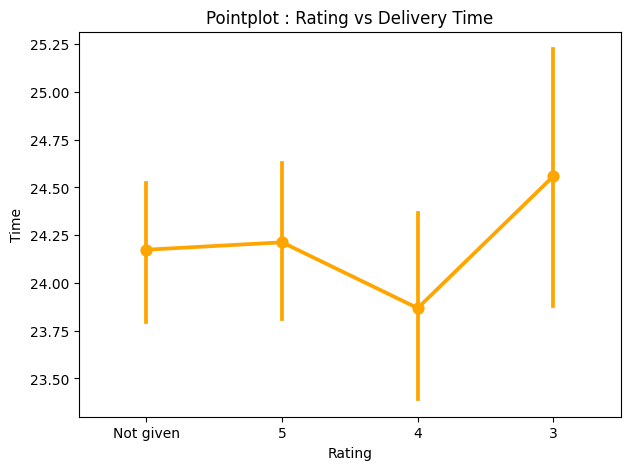

In [53]:
# Relationship between Rating and Delivery Time
plt.figure(figsize = (7,5))
plt.title('Pointplot : Rating vs Delivery Time')
plt.xlabel('Rating')
plt.ylabel('Time')
sns.pointplot(data=data, x='rating', y='delivery_time', color='orange', order= data['rating'].value_counts().index);

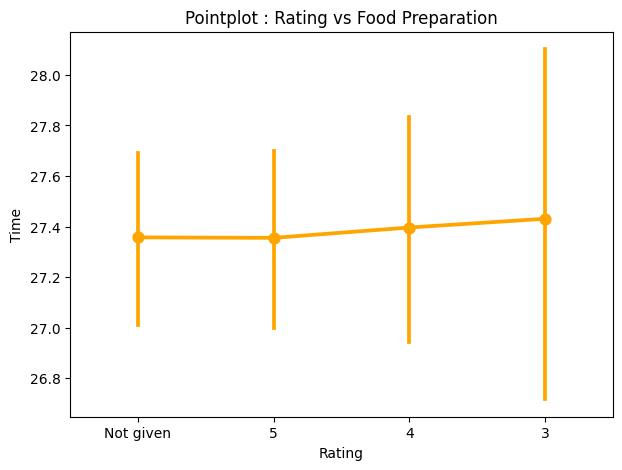

In [54]:
# Relationship between Rating and Food Preparation
plt.figure(figsize = (7,5))
plt.title('Pointplot : Rating vs Food Preparation')
plt.xlabel('Rating')
plt.ylabel('Time')
sns.pointplot(data=data, x='rating', y='food_preparation_time', color='orange', order= data['rating'].value_counts().index);

**Observation:**

Ratings vs Day of the Week:

* *Not given ratings are the most frequent, especially during weekends with over 500 occurrences.*
* *Among given ratings, 5-star ratings are the most common, followed by 4-star ratings, with 3-star ratings being the least frequent.*
* *Weekend orders consistently show higher frequencies across all rating categories compared to weekdays.*
* *There are no ratings below 3 shown in the data. Suggesting that the scale is 5 to 3.*
* *A significant portion of customers who don't provide ratings.*


Ratings vs Cost:
* *5-star rated orders show the highest average cost (around \$17), suggesting that more expensive orders tend to receive higher ratings.*
* *3-star ratings shows the largest variation in cost.*
* *Just considering given ratings (5,4,3). There is a slight positive correlation between cost and rating. Where more expensive orders have a better rating*

Rating vs Delivery Times:

* *Delivery times generally fall between 23.25 and 25.25 minutes across all rating categories.*
* *3-star ratings show the highest average delivery time (around 24.5 minutes) and also the largest variation in delivery times.*
* *4-star ratings have the lowest average delivery time (around 23.9 minutes).*
* *"Not given" and 5-star ratings show similar delivery times (around 24.2 minutes) with comparable variations.*
* *There's no clear linear relationship between delivery time and rating, suggesting that faster delivery doesn't necessarily lead to better ratings. As 5-star ratings have higher delivery times than 4-star ratings.*

Rating vs Food Preparation:

* *Food preparation times are remarkably consistent across all rating categories, hovering around 27.4 minutes.*
* *All ratings show similar variation in preparation times (roughly between 27.0 and 28.0 minutes).*
* *Orders with 3-star ratings show the largest variation in preparation times, as indicated by the longer error bars.*
* *The nearly flat line suggests that food preparation time has little to no impact on customer ratings.*

#### Day of the Week

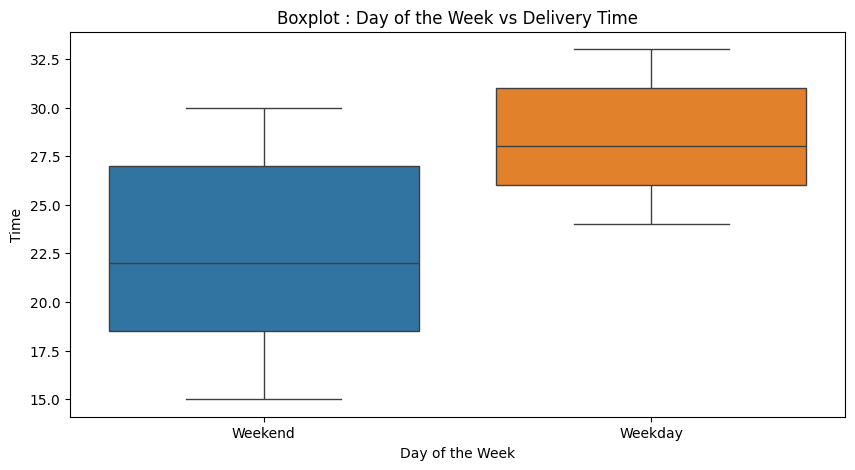

In [55]:
# Observe the distribuiton of delivery times during weekends and weekdays
plt.figure(figsize = (10,5))
plt.title('Boxplot : Day of the Week vs Delivery Time')
plt.xlabel('Day of the Week')
plt.ylabel('Time')
sns.boxplot(data=data, x='day_of_the_week', y='delivery_time', hue='day_of_the_week');

In [56]:
# Obtain the statistics for delivery time on weekends
data[data['day_of_the_week'] == 'Weekend']['delivery_time'].describe()

count    1351.000000
mean       22.470022
std         4.628938
min        15.000000
25%        18.500000
50%        22.000000
75%        27.000000
max        30.000000
Name: delivery_time, dtype: float64

In [57]:
# Obtain the statistics for delivery time on weekdays
data[data['day_of_the_week'] == 'Weekday']['delivery_time'].describe()

count    547.000000
mean      28.340037
std        2.891428
min       24.000000
25%       26.000000
50%       28.000000
75%       31.000000
max       33.000000
Name: delivery_time, dtype: float64

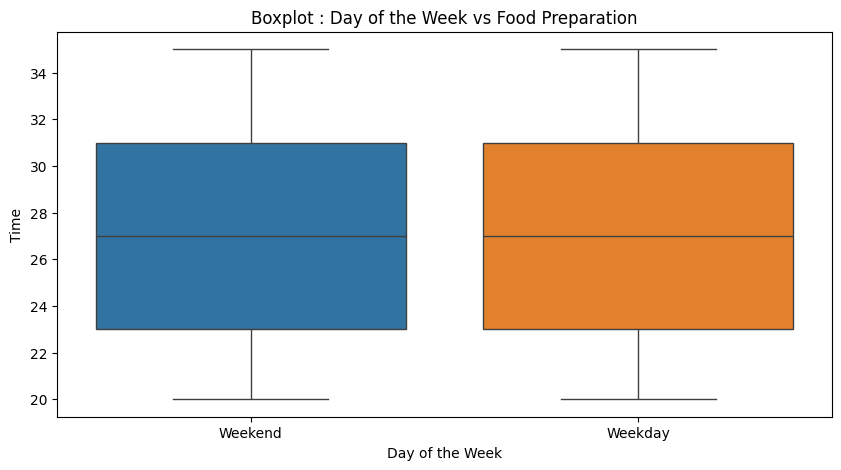

In [58]:
# Observe the distribuiton of food preparation times during weekends and weekdays
plt.figure(figsize = (10,5))
plt.title('Boxplot : Day of the Week vs Food Preparation')
plt.xlabel('Day of the Week')
plt.ylabel('Time')
sns.boxplot(data=data, x='day_of_the_week', y='food_preparation_time', hue='day_of_the_week');

In [59]:
# Obtain the statistics for food preparation time on weekends
data[data['day_of_the_week'] == 'Weekend']['food_preparation_time'].describe()

count    1351.000000
mean       27.436714
std         4.601476
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [60]:
# Obtain the statistics for food preparation time on weekdays
data[data['day_of_the_week'] == 'Weekday']['food_preparation_time'].describe()

count    547.000000
mean      27.212066
std        4.708616
min       20.000000
25%       23.000000
50%       27.000000
75%       31.000000
max       35.000000
Name: food_preparation_time, dtype: float64

*Observation:*

Day of the Week vs Delivery Time:
* *Weekday deliveries generally have longer delivery times, with a median around 28 minutes and range from about 24 to 32.5 minutes.*
* *Weekend deliveries*: Tend to be faster, with a median around 22 minutes and range from about 15 to 30 minutes.*
* *Weekday delivery times show less variation compared to weekend delivery times.*
* *The faster weekend deliveries might be due to less traffic or different staffing levels compared to weekdays.*
* Weekend:
   - Maximum = 30 minutes
   - Minimum = 15 minutes
   - Mean = 22.47 minutes
   - Median = 22 minutes
   - Q1 (25 percentile): 18.50 minutes
   - Q3 (75 percentile): 27 minutes
* Weekday:
    - Maximum = 33 minutes
    - Minimum = 24 minutes
    - Mean = 28.34 minutes
    - Median = 28 minutes
    - Q1 (25 percentile): 26 minutes
    - Q3 (75 percentile): 31 minutes

Day of the Week vs Food Preparation Time:
* *Both weekends and weekdays show similar median food preparation times of around 27 minutes.*
* *Both periods show preparation times ranging from about 20 to 35 minutes.*
* *The interquartile ranges (boxes) are nearly identical, suggesting similar variability in preparation times regardless of the day.*
* *No significant outliers are present, indicating consistent kitchen operations throughout the week.*
* Weekend:
   - Maximum = 35 minutes
   - Minimum = 20 minutes
   - Mean = 27.43 minutes
   - Median = 27 minutes
   - Q1 (25 percentile): 23 minutes
   - Q3 (75 percentile): 31 minutes
* Weekday:
    - Maximum = 35 minutes
    - Minimum = 20 minutes
    - Mean = 27.21 minutes
    - Median = 27 minutes
    - Q1 (25 percentile): 23 minutes
    - Q3 (75 percentile): 31 minutes



#### Correlation

In [61]:
# Generate the correlation matrix of the numerica variables
columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
corr = data[columns].corr()
corr

,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.041527,-0.029949
food_preparation_time,0.041527,1.000000,0.011094
delivery_time,-0.029949,0.011094,1.000000


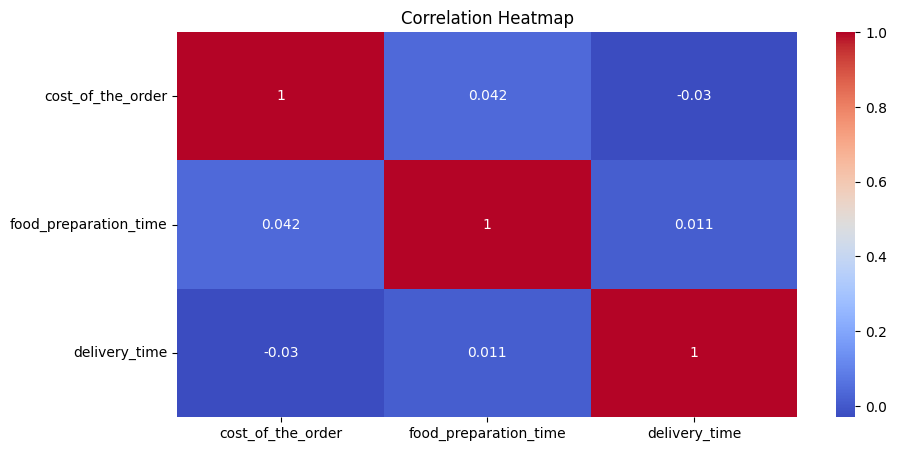

In [62]:
# Generate the Heat Map using the correlation matrix
plt.figure(figsize=(10, 5))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, cmap='coolwarm',);

*Observation:*

*This correlation heatmap shows the relationships between cost, food preparation time, and delivery time.*

* *There's a very slight positive correlation (0.042) between order cost and food preparation time, and a tiny positive correlation (0.011) between food preparation time and delivery time. This indicates weak positive correlations between these variables*:
* *There's a very weak negative correlation (-0.03) between order cost and delivery time.*
* *The correlations are all very close to zero, suggesting these variables are largely independent of each other.*
* *The weak correlations suggest that more expensive orders don't necessarily take longer to prepare or deliver, and preparation time doesn't strongly influence delivery time.*

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [63]:
# Obtain the count and average rating for each restaurant
rate_count = rating_nan.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
rate_average = rating_nan.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).round(2).reset_index()
rate_data = pd.merge(rate_count, rate_average, on='restaurant_name')
rate_data.columns = ['Restaurant', 'Count', 'Average']

In [64]:
# Display the restaurants with more than 50 ratings.
rate_data[rate_data['Count'] > 50]

,Restaurant,Count,Average
0,Shake Shack,133,4.28
1,The Meatball Shop,84,4.51
2,Blue Ribbon Sushi,73,4.22
3,Blue Ribbon Fried Chicken,64,4.33


In [65]:
# Display the restaurants with an average rating grater than 4.
rate_data[rate_data['Average'] > 4]

,Restaurant,Count,Average
0,Shake Shack,133,4.28
1,The Meatball Shop,84,4.51
2,Blue Ribbon Sushi,73,4.22
3,Blue Ribbon Fried Chicken,64,4.33
4,RedFarm Broadway,41,4.24
...,...,...,...
141,Klong,1,5.00
142,Moonstruck on Second,1,5.00
145,Olive Garden,1,5.00
153,Taro Sushi,1,5.00


In [66]:
# Display the restaurants with more than 50 ratings and an average rating greater than 4.
rate_data[(rate_data['Count'] > 50) & (rate_data['Average'] > 4)].sort_values(by='Average', ascending=False).reset_index(drop=True)

,Restaurant,Count,Average
0,The Meatball Shop,84,4.51
1,Blue Ribbon Fried Chicken,64,4.33
2,Shake Shack,133,4.28
3,Blue Ribbon Sushi,73,4.22


#### Observations:

*Only 4 restaurants have more than 50 ratings. 110 restaurants have a rating grater than 4.*

*The restaurants with a rating grater than 4 and with more than 50 ratings are:*

* The Meatball Shop: 4.51 average rating
* Blue Ribbon Fried Chicken: 4.33 average rating
* Shake Shack: 4.28 average rating
* Blue Ribbon Sushi: 4.22 average rating

*The most reviewed restaurant is Shake Shack with 133 reviews. The best reviewed restaurant form this group is The Meatball Shop with an average rating of 4.51*


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [67]:
# Calculate the net Revenue for order with a cost higher than 5 dollars and the ones with cost higher than 20 dollars
company_revenue = data.copy()
company_revenue['revenue'] = 0.00
company_revenue.loc[company_revenue['cost_of_the_order'] > 20, 'revenue'] = company_revenue['cost_of_the_order'] * 0.25
company_revenue.loc[(company_revenue['cost_of_the_order'] > 5) & (company_revenue['cost_of_the_order'] <= 20), 'revenue'] = company_revenue['cost_of_the_order'] * 0.15
print(f"Net Revenue: ${company_revenue['revenue'].sum().round(2)}")


Net Revenue: $6166.3


#### Observations:

*The company generated a Net Revenue of **$6,166.30** dollars.*

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [68]:
# Add Food Preparation Time and Delivery Time. Then calculate the percentage of orders that take more than 60 minutes to get delivered
total_time = data.copy()
total_time['total_time'] = total_time['food_preparation_time'] + total_time['delivery_time']
print(f"Just {round(total_time[total_time['total_time'] > 60].shape[0] / total_time.shape[0] * 100, 2)}% of orders take more than 60 minutes to get delivered from the time the order is placed.")

Just 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.


#### Observations:

*Just 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.*

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [69]:
# Obtain the mean delivery time for Weekends and Weekdays
data.groupby(['day_of_the_week'])['delivery_time'].mean().round(2)

day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64

#### Observations:


* *Weekdays: Average delivery time is 28.34 minutes*
* *Weekends: Average delivery time is 22.47 minutes*

*This indicates that weekend deliveries are approximately 6 minutes faster than weekday deliveries, which could be due to factors like reduced traffic or different staffing levels during weekends.*

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

* **Customer Behavior**:
  - *Orders are significantly higher during weekends (71.18%) compared to weekdays (28.82%), indicating strong weekend-focused customer preferences.*
  - *Customers predominantly place orders in 10 restaurants. Out of the total 178 restaurants, 50 have received only one order, 23 have received two orders, and another 23 have received three orders. Few others hover between 4 and 9 orders.*
  - *The majority of customers (65%) are single-order buyers, indicating a need to focus on acquiring repeat customers.*

* **Cuisine Preferences**:
  - *American (30.77%), Japanese (24.76%), and Italian (15.70%) cuisines dominate the market.This indicates a strong preference for familiar and diverse options like burgers, sushi, and pasta.*
  - *Shake Shack leads in popularity, boasting the highest order count (219) and revenue. The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken also rank high, highlighting the importance of these establishments in driving revenue.*

* **Rating Patterns**:
  - *38.78% of orders lack ratings, while among rated orders, high satisfaction is evident with 30.98% giving 5-stars and 20.34% giving 4-stars.*
  - *There is a slight positive correlation between order cost and rating. Higher-cost orders tend to receive better ratings. 5-star orders have a higher average cost of around \$17.*
  - *3-star ratings show the highest delivery time on average (24.5 minutes) with greater variability.*
  - *4-star ratings have the lowest delivery time (23.9 minutes), suggesting faster delivery might slightly improve customer satisfaction.*
  - *5-star ratings don't necessarily correlate with the shortest delivery times (24.2 minutes).*

* **Delivery Performance**:
  - *Weekend deliveries (22.47 minutes) are notably faster than weekday deliveries (28.34 minutes), suggesting traffic or staffing levels impacts delivery times.*
  - *There’s a significant 6-minute difference in delivery times, hinting at potential inefficiencies on weekdays.*

* **Cost Analysis**:
  - *Higher-priced orders tend to receive better ratings, with 5-star rated orders averaging around $17.*

* **Revenue Analysis**:
  - *The company earned \$6,166.30 in net revenue. Orders costing above \$20 are particularly valuable due to higher profit margins. These represent 29.24% of the total orders but likely contribute a disproportionate amount to net revenue.*

### Recommendations:

* **Rating System Enhancement**:
  - *Consider automatic prompts that remind customers to provide a rating.*
  - *Implement initiatives like offering small discounts for providing ratings. This can help gather more insights into customer satisfaction.*

* **Restaurant and Cuisine Strategy**:
  - *Focus on promoting high-margin items in popular cuisines (American, Japanese, Italian) while maintaining diverse options.*
  - *Highlight less popular cuisines inside Food Hub with banners and offer introductory discounts or bundles for these cuisines to incentivize first-time orders.*
  - *Pair low order restaurants with popular cuisines in promotional bundles.*

* **Customer Loyalty**:
  - *Develop targeted promotions for frequent customers, as data shows only a small percentage (1.17%) are high-frequency users.*
  - *Convert one time customers to frequent customers. Give discounts for a second order to this customers. Post purchase follow up with this customers, in order to notify them of new menu items or restaurants.*
  - *Create a loyalty program, reward customer with repeat orders.*

* **Delivery Efficiency**:
  - *Strengthen weekend operations as they represent over 70% of orders, ensuring adequate staffing and resources.*
  - *Analyze the slower weekday delivery times to optimize routes or adjust staffing during peak hours.*

* **Maximize Revenue**:
 - *Focus on High-Margin orders. Promoting combo deals or upsell options to boost order values above $20.*

---